In [47]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
from google.colab import files
d = files.upload()

Saving wine_data.csv to wine_data.csv


In [4]:
df = pd.read_csv('wine_data.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [9]:
df.shape

(21000, 12)

In [10]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
def outlier_check(row, colname):
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier

outliers = pd.DataFrame() #Creates an empty DataFrame to store all detected outliers

for col in df.select_dtypes(include=['number']).columns: #Selects only numerical columns from the DataFrame df
    outliers_in_col = outlier_check(df, col)
    outliers = pd.concat([outliers, outliers_in_col]) #collects outliers from all columns into a single DataFrame.

outliers.reset_index(drop=True, inplace=True)
#drop=True: Prevents the old index from being added as a column
#inplace=True: Modifies the DataFrame directly instead of creating a new one.
outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,10.1,0.94,0.91,32.2,0.202,188.3,206.6,1.01769,3.65,1.22,11.9,3
1,9.1,0.40,0.96,43.3,0.275,131.2,107.0,1.02308,3.68,1.13,11.1,3
2,8.4,1.29,1.27,47.8,0.389,210.2,353.0,1.01757,3.65,1.28,11.6,3
3,7.4,1.16,1.34,31.6,0.281,198.0,268.4,1.01553,3.72,1.34,11.5,3
4,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
106,10.6,1.03,1.13,40.2,0.374,97.8,242.6,1.01932,3.70,1.49,12.4,9
107,7.1,0.96,1.20,55.3,0.422,98.2,303.6,1.01273,3.64,0.97,11.2,9
108,7.1,0.96,1.20,55.3,0.422,98.2,303.6,1.01273,3.64,0.97,11.2,9
109,13.9,0.46,1.24,47.0,0.272,182.4,218.1,1.01958,3.73,0.72,11.6,9


In [14]:
# Identify all outliers
outlier_indices = outliers.index
# Remove outliers from the original df
df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)

In [19]:
df_cleaned.shape

(20889, 12)

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

<ipython-input-58-fa1f25f78e46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=colors)


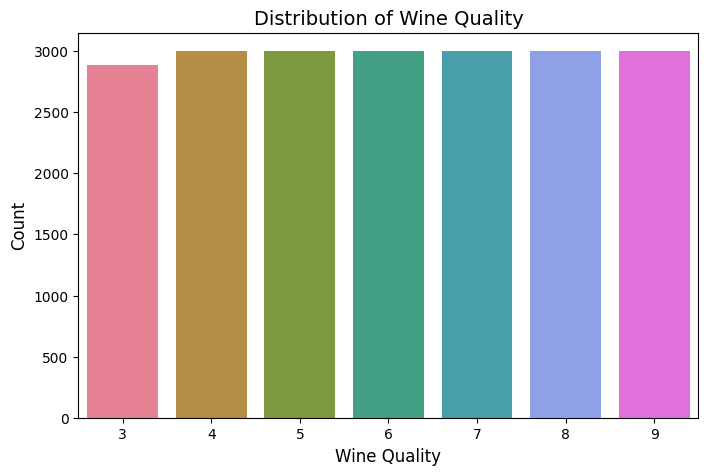

In [58]:
quality_counts = df_cleaned["quality"].value_counts().sort_index()
colors = sns.color_palette("husl", len(quality_counts))
plt.figure(figsize=(8, 5))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=colors)
plt.xlabel("Wine Quality", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Wine Quality", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-39-833705632430>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df_cleaned, palette="bright")


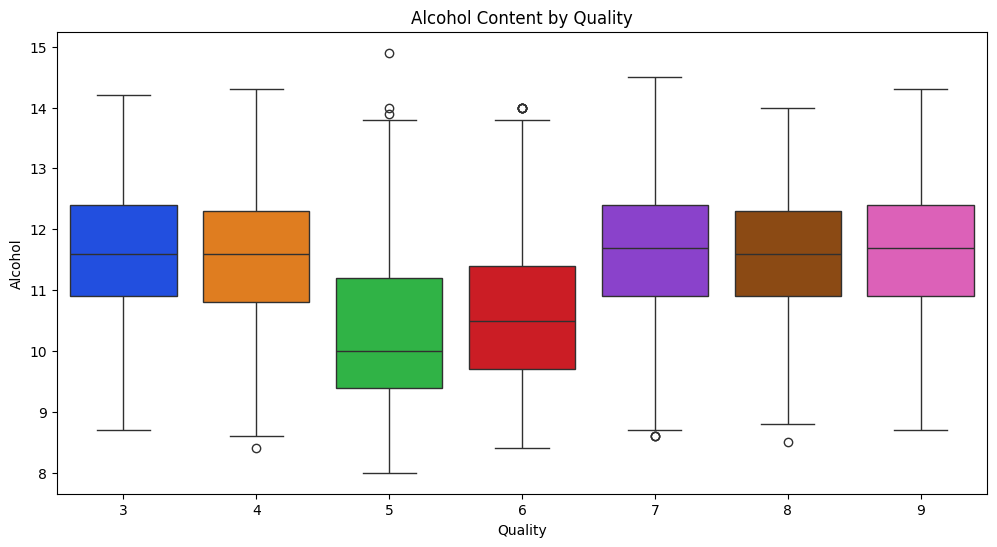

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=df_cleaned, palette="bright")
plt.title('Alcohol Content by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<ipython-input-40-9155f861eccc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='alcohol', data=df_cleaned, palette="deep")


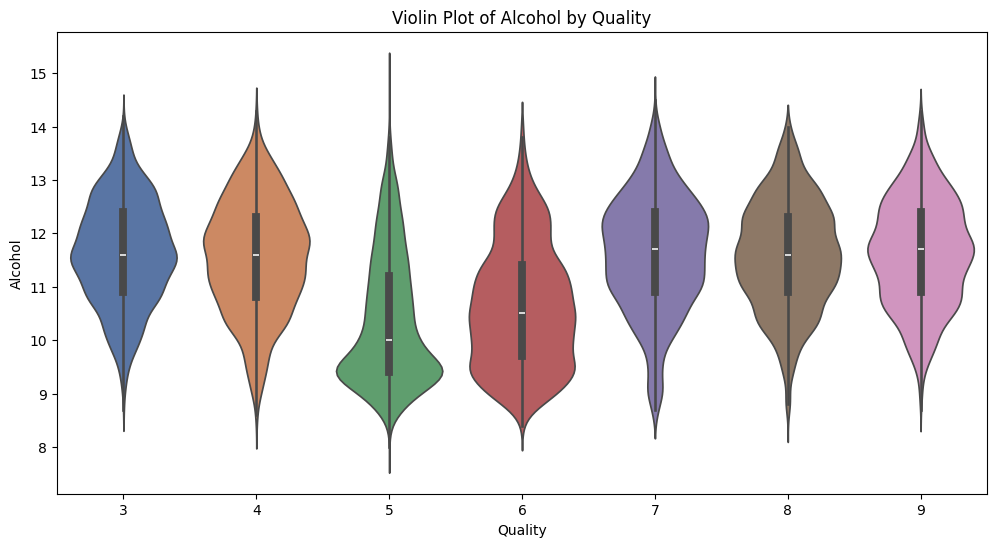

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='alcohol', data=df_cleaned, palette="deep")
plt.title('Violin Plot of Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

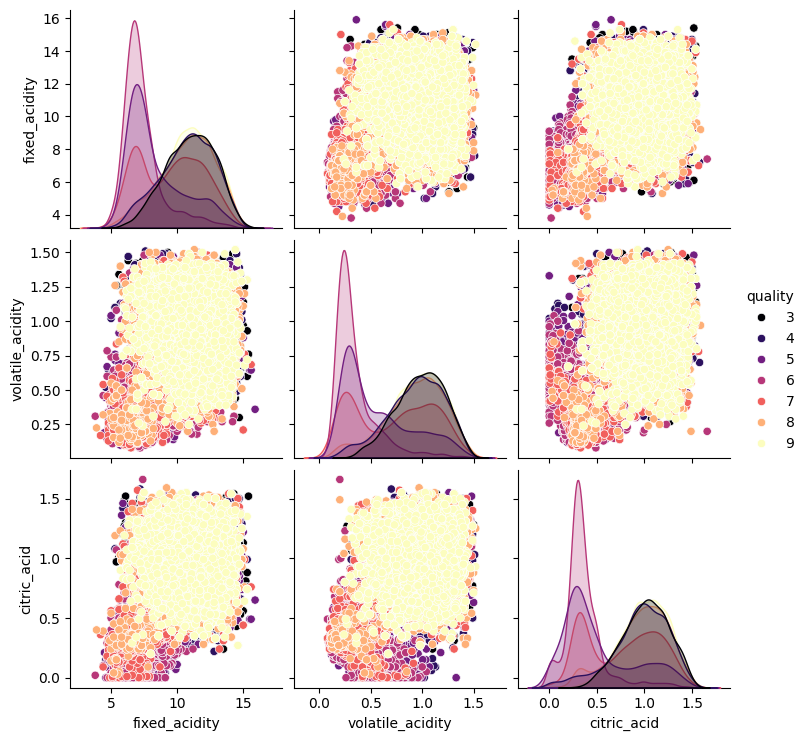

In [41]:
sns.pairplot(df_cleaned, vars=['fixed_acidity', 'volatile_acidity', 'citric_acid'], hue='quality', palette="magma")
plt.show()

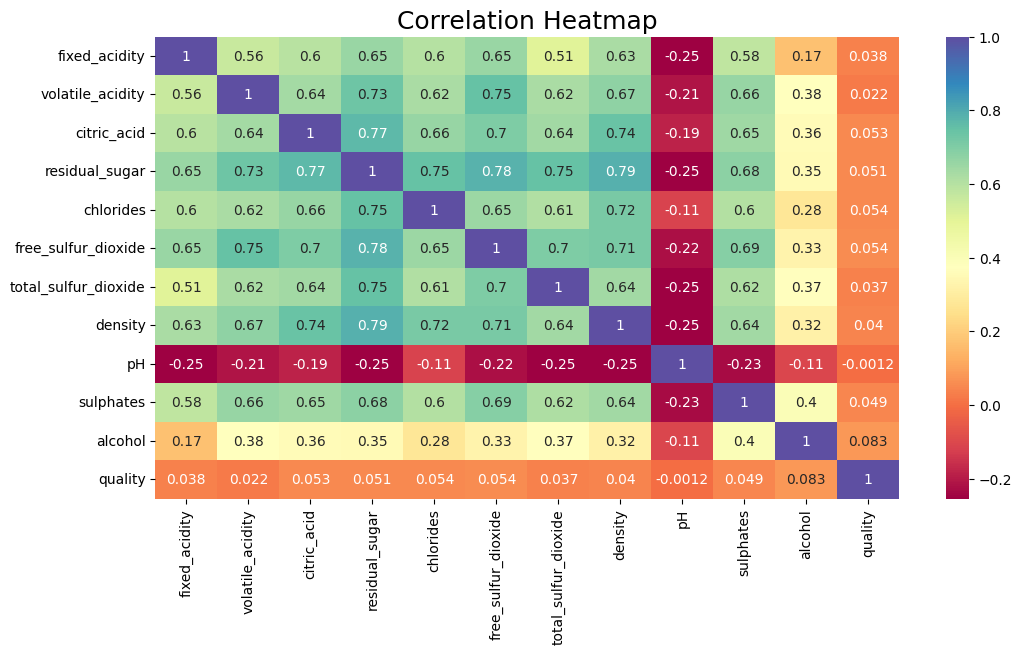

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="Spectral")
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [29]:
X = df_cleaned.iloc[:, 0:11]
y = df_cleaned.iloc[:,-1]

In [30]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.5,1.23,0.97,20.8,0.225,195.5,157.7,1.01509,3.11,1.39,11.4
1,13.5,1.23,0.75,45.4,0.291,123.8,243.5,1.03296,2.95,1.16,11.6
2,9.9,0.85,1.29,53.5,0.350,97.1,292.0,1.01842,3.07,1.58,11.6
3,12.9,1.08,1.21,33.7,0.230,147.7,258.1,1.00716,3.33,1.77,11.9
4,13.4,1.17,1.41,46.9,0.287,273.4,275.3,1.01168,3.23,1.03,10.7
...,...,...,...,...,...,...,...,...,...,...,...
20884,9.7,1.02,0.91,50.0,0.412,114.6,181.7,1.02085,3.30,0.89,12.0
20885,10.2,0.61,0.88,53.8,0.250,62.4,204.7,1.02776,3.52,1.14,9.7
20886,13.4,0.46,1.04,52.1,0.449,63.0,273.5,1.02618,2.89,1.76,9.3
20887,6.6,1.03,1.09,25.3,0.138,179.8,295.0,1.02476,2.94,1.54,12.9


In [31]:
y

,quality
0,3
1,3
2,3
3,3
4,3
...,...
20884,9
20885,9
20886,9
20887,9


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
"Decision Tree Gini": DecisionTreeClassifier(random_state=42),
"Decision Tree IG": DecisionTreeClassifier(random_state=42, criterion="entropy"),
"Random Forest Gini": RandomForestClassifier(n_estimators=100, random_state=42),
"Random Forest IG": RandomForestClassifier(n_estimators=100, random_state=42, criterion="entropy")
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

In [46]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree Gini,0.591671,0.591719,0.591671,0.591311
1,Decision Tree IG,0.585448,0.585169,0.585448,0.585051
2,Random Forest Gini,0.616084,0.628700,0.616084,0.615083
3,Random Forest IG,0.615845,0.625942,0.615845,0.615072


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model:
Model        Random Forest Gini
Accuracy               0.616084
Precision                0.6287
Recall                 0.616084
F1-Score               0.615083
Name: 2, dtype: object


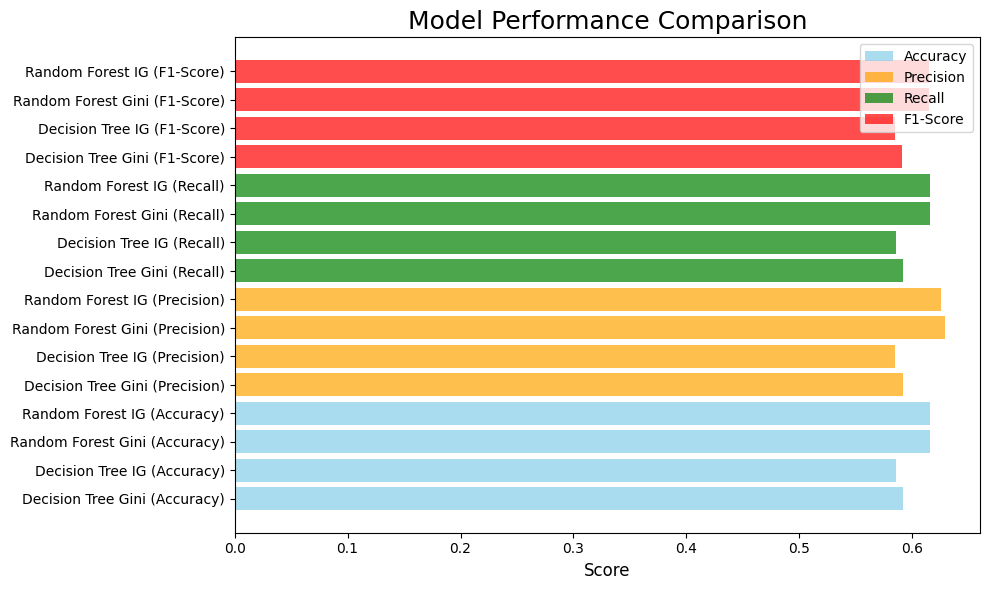


Optimal Model based on Accuracy: Random Forest Gini with Accuracy = 0.6161


In [48]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")